<a href="https://colab.research.google.com/github/adrianebz/CN/blob/main/Cinem%C3%A1tica_3ava.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

QUESTÃO 1 - CINEMÁTICA. 3 AVA

> Determinar O₄A e θ₄ para θ₂ = 135° (O₂A = 4.5 in).



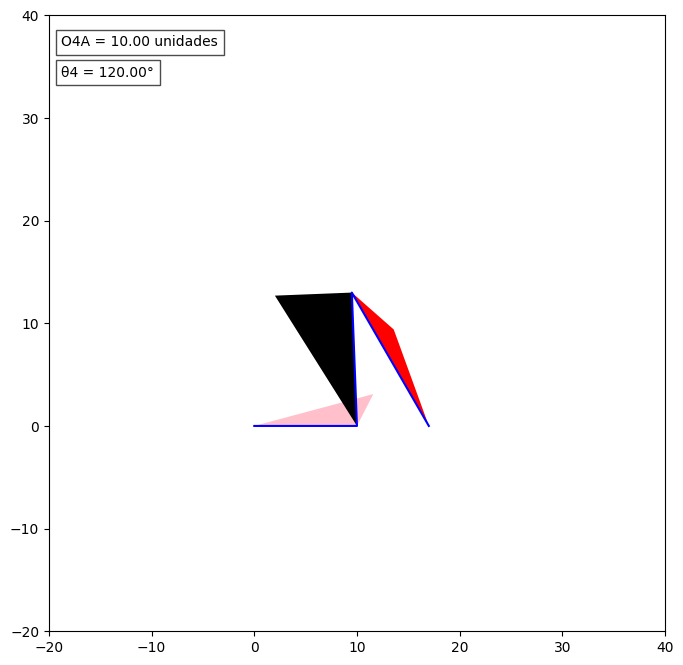

In [50]:
import numpy as np
import matplotlib.pyplot as plt
from math import atan2, sin, cos, sqrt, radians

# Comprimentos dos elos
a = 10; b = 13; c = 15; d = 17

# Pontos fixos
O2 = np.array([0, 0])
O4 = np.array([d, 0])

# Pontos de interesse
s = 12; delta2 = radians(15)
p = 15; delta3 = radians(30)
u = 10; delta4 = radians(-10)

# Configuração do gráfico dinâmico
plt.ion()
fig, ax = plt.subplots(figsize=(10, 8))
ax.set_xlim(-20, 40)
ax.set_ylim(-20, 40)
ax.set_aspect('equal')
ax.grid(True)
ax.set_title('Mecanismo de 4 Barras com Exibição de O4A e θ4')

# Inicializa elementos gráficos
(line_mechanism,) = ax.plot([], [], 'b-', lw=2)
(fill_S,) = ax.fill([], [], 'pink', alpha=0.5)
(fill_P,) = ax.fill([], [], 'black', alpha=0.5)
(fill_U,) = ax.fill([], [], 'red', alpha=0.5)
(text_o4a) = ax.text(0.02, 0.95, '', transform=ax.transAxes, fontsize=10, bbox=dict(facecolor='white', alpha=0.7))
(text_theta4) = ax.text(0.02, 0.90, '', transform=ax.transAxes, fontsize=10, bbox=dict(facecolor='white', alpha=0.7))

for theta2 in np.arange(0, 2*np.pi*2, 0.1):  # 720 graus
    # --- Cálculos das posições ---
    # Ponto A
    Ax, Ay = a * cos(theta2), a * sin(theta2)
    A = np.array([Ax, Ay])

    # Ponto B
    S_val = (a**2 - b**2 + c**2 - d**2) / (2 * (Ax - d))
    P_val = (Ay**2) / ((Ax - d)**2) + 1
    Q_val = 2 * Ay * (d - S_val) / (Ax - d)
    R_val = (d - S_val)**2 - c**2
    By = (-Q_val + sqrt(Q_val**2 - 4 * P_val * R_val)) / (2 * P_val)
    Bx = S_val - (Ay * By) / (Ax - d)
    B = np.array([Bx, By])

    # Ângulos
    theta3 = atan2(By - Ay, Bx - Ax)
    theta4 = atan2(By, Bx - d)

    # Pontos de interesse
    S = s * np.array([cos(theta2 + delta2), sin(theta2 + delta2)])
    P = A + p * np.array([cos(theta3 + delta3), sin(theta3 + delta3)])
    U = O4 + u * np.array([cos(theta4 + delta4), sin(theta4 + delta4)])  # O4A

    # Comprimento O4A (distância entre O4 e U)
    o4a_length = np.linalg.norm(U - O4)  # Calcula a norma do vetor O4-U

    # --- Atualização do gráfico ---
    ax.clear()
    ax.plot([O2[0], A[0], B[0], O4[0]], [O2[1], A[1], B[1], O4[1]], 'b-')
    ax.fill([O2[0], A[0], S[0]], [O2[1], A[1], S[1]], 'pink')
    ax.fill([A[0], B[0], P[0]], [A[1], B[1], P[1]], 'black')
    ax.fill([O4[0], B[0], U[0]], [O4[1], B[1], U[1]], 'red')

    # Textos dinâmicos
    ax.text(0.02, 0.95, f'O4A = {o4a_length:.2f} unidades', transform=ax.transAxes,
            fontsize=10, bbox=dict(facecolor='white', alpha=0.7))
    ax.text(0.02, 0.90, f'θ4 = {np.degrees(theta4):.2f}°', transform=ax.transAxes,
            fontsize=10, bbox=dict(facecolor='white', alpha=0.7))

    ax.set_xlim(-20, 40)
    ax.set_ylim(-20, 40)
    ax.set_aspect('equal')
    plt.pause(0.001)

plt.ioff()
plt.show()

QUESTÃO 2 - CINEMÁTICA.3 AVA

> Determine percuso de P e o deslocamento angular de 3 e 4



In [52]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML, display
import imageio

# Parâmetros do mecanismo
L1, L2, L3, L4 = 56.4, 25.4, 52.3, 59.2
p = 77.7
delta = np.radians(-31)

# Configuração da figura principal
fig = plt.figure(figsize=(12, 10))
ax1 = fig.add_subplot(2, 2, (1, 3))
ax1.set_xlim(-50, 100)
ax1.set_ylim(-50, 100)
ax1.set_aspect('equal')
ax1.grid(True)
ax1.set_title('Mecanismo de Quatro Barras')

# Configuração dos gráficos de deslocamento angular
ax2 = fig.add_subplot(2, 2, 2)
ax2.set_xlim(0, 2*np.pi)
ax2.set_ylim(-np.pi, np.pi)
ax2.grid(True)
ax2.set_title('Deslocamento Angular da Haste 3 (θ3)')
ax2.set_xlabel('θ2 (rad)')
ax2.set_ylabel('θ3 (rad)')

ax3 = fig.add_subplot(2, 2, 4)
ax3.set_xlim(0, 2*np.pi)
ax3.set_ylim(-np.pi, np.pi)
ax3.grid(True)
ax3.set_title('Deslocamento Angular da Haste 4 (θ4)')
ax3.set_xlabel('θ2 (rad)')
ax3.set_ylabel('θ4 (rad)')

# Inicialização dos elementos gráficos
link, = ax1.plot([], [], 'b-', lw=2)
path, = ax1.plot([], [], 'r-', lw=1.5)
triangle = ax1.fill([], [], 'k', alpha=0.5)[0]
point_P, = ax1.plot([], [], 'ro', markersize=5)
point_P_path, = ax1.plot([], [], 'g-', lw=1, alpha=0.7)

# Para os gráficos de deslocamento
theta2_values = []
theta3_values = []
theta4_values = []
theta3_line, = ax2.plot([], [], 'b-', lw=1.5)
theta4_line, = ax3.plot([], [], 'r-', lw=1.5)

# Lista para armazenar frames do GIF
gif_frames = []

# Lista para armazenar o percurso do ponto P
Px_path = []
Py_path = []

def init():
    """Função de inicialização para a animação"""
    link.set_data([], [])
    path.set_data([], [])
    triangle.set_xy(np.empty((0, 2)))
    point_P.set_data([], [])
    point_P_path.set_data([], [])
    theta3_line.set_data([], [])
    theta4_line.set_data([], [])
    return link, path, triangle, point_P, point_P_path, theta3_line, theta4_line

def update(frame):
    theta2 = np.radians(frame * 3)

    # Cálculo dos pontos A e B
    Ax, Ay = L2*np.cos(theta2), L2*np.sin(theta2)

    S = (L2**2 - L3**2 + L4**2 - L1**2) / (2 * (Ax - L1))
    P_val = (Ay**2) / ((Ax - L1)**2) + 1
    Q = 2 * Ay * (L1 - S) / (Ax - L1)
    R = (L1 - S)**2 - L4**2

    By = (-Q + np.sqrt(Q**2 - 4 * P_val * R)) / (2 * P_val)
    Bx = S - (Ay * By) / (Ax - L1)

    theta3 = np.arctan2(By - Ay, Bx - Ax)
    theta4 = np.arctan2(By, Bx - L1)

    Px = Ax + p*np.cos(theta3 + delta)
    Py = Ay + p*np.sin(theta3 + delta)

    # Armazena os valores para os gráficos
    theta2_values.append(theta2)
    theta3_values.append(theta3)
    theta4_values.append(theta4)

    # Armazena o percurso do ponto P
    Px_path.append(Px)
    Py_path.append(Py)

    # Atualização dos gráficos do mecanismo
    link.set_data([0, Ax, Bx, L1], [0, Ay, By, 0])
    triangle.set_xy(np.array([[Ax, Ay], [Bx, By], [Px, Py]]))
    point_P.set_data([Px], [Py])
    point_P_path.set_data(Px_path, Py_path)

    # Atualização dos gráficos de deslocamento
    theta3_line.set_data(theta2_values, theta3_values)
    theta4_line.set_data(theta2_values, theta4_values)

    # Captura o frame atual para o GIF
    if frame % 3 == 0:  # Captura 1 a cada 3 frames
        fig.canvas.draw()
        width, height = fig.canvas.get_width_height()
        image = np.frombuffer(fig.canvas.buffer_rgba(), dtype='uint8')
        image = image.reshape((height, width, 4))
        gif_frames.append(image)

    return link, triangle, point_P, point_P_path, theta3_line, theta4_line

# Cria a animação
ani = FuncAnimation(fig, update, frames=120, init_func=init, interval=50, blit=True)

# Exibe a animação no notebook
plt.close()  # Fecha a figura estática
display(HTML(ani.to_html5_video()))

# Salva como GIF (usando apenas os frames capturados)
imageio.mimsave('mecanismo_completo.gif', gif_frames, fps=15)

# Faz download do GIF
from google.colab import files
files.download('mecanismo_completo.gif')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

QUESTÃ 3 - CINEMÁTICA. 3 AVA

> Determinar θ₃ e θ₄ para θ₂ = π/3 rad em um mecanismo de 4 barras usando Newton-Raphson (tolerância = 10⁻³).




RESULTADOS DA ANÁLISE CINEMÁTICA
--------------------------------
Ângulos:
θ₂ = 60.00°
θ₃ = 16.65°
θ₄ = 80.77°

Velocidades Angulares (para ω₂ = 1 rad/s):
ω₃ = -0.2190 rad/s
ω₄ = 0.5449 rad/s


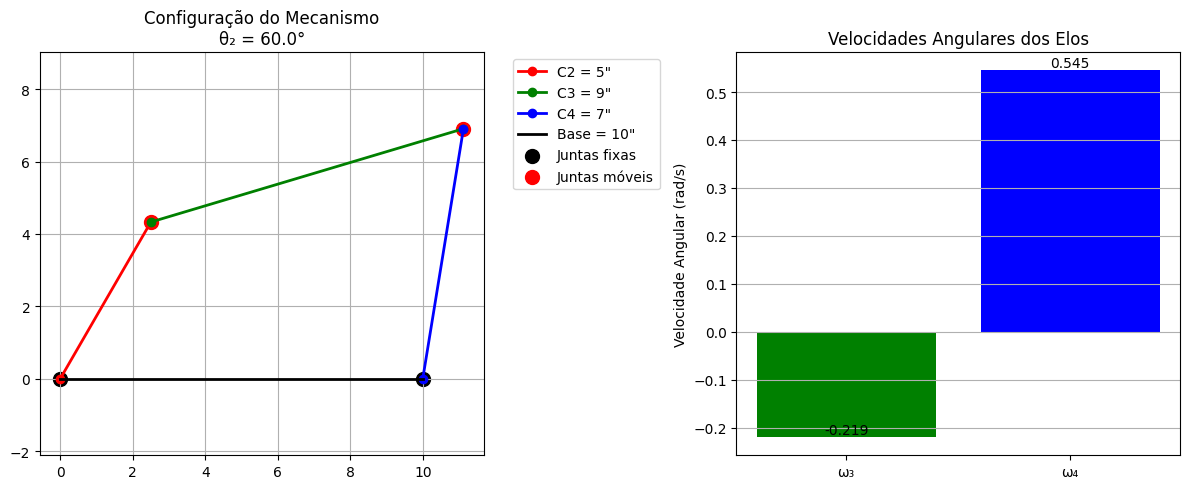

In [40]:
import numpy as np
import matplotlib.pyplot as plt

# Parâmetros do mecanismo
C1 = 10  # in (base fixa)
C2 = 5   # in (elo de entrada)
C3 = 9   # in (elo acoplador)
C4 = 7   # in (elo de saída)
theta2 = np.pi/3  # rad (ângulo de entrada)
omega2 = 1.0      # rad/s (velocidade angular de entrada - exemplo)


def position_analysis(theta2, tol=1e-6, max_iter=100):
    theta3 = np.pi/4  # Estimativa inicial
    theta4 = np.pi/3  # Estimativa inicial

    for _ in range(max_iter):
        # Equações de posição
        F1 = C2*np.cos(theta2) + C3*np.cos(theta3) - C4*np.cos(theta4) - C1
        F2 = C2*np.sin(theta2) + C3*np.sin(theta3) - C4*np.sin(theta4)

        # Matriz Jacobiana
        J = np.array([
            [-C3*np.sin(theta3), C4*np.sin(theta4)],
            [C3*np.cos(theta3), -C4*np.cos(theta4)]
        ])

        # Solução do sistema
        dTheta = np.linalg.solve(J, [-F1, -F2])

        theta3 += dTheta[0]
        theta4 += dTheta[1]

        if np.linalg.norm(dTheta) < tol:
            break

    return theta3, theta4

theta3, theta4 = position_analysis(theta2)


def velocity_analysis(theta2, theta3, theta4, omega2):
    # Matriz dos coeficientes (mesma Jacobiana da análise de posição)
    A = np.array([
        [-C3*np.sin(theta3), C4*np.sin(theta4)],
        [C3*np.cos(theta3), -C4*np.cos(theta4)]
    ])

    # Vetor de termos independentes
    b = np.array([
        [C2*omega2*np.sin(theta2)],
        [-C2*omega2*np.cos(theta2)]
    ])

    # Resolve o sistema linear para velocidades
    omega3, omega4 = np.linalg.solve(A, b)

    return omega3[0], omega4[0]

omega3, omega4 = velocity_analysis(theta2, theta3, theta4, omega2)


print("\nRESULTADOS DA ANÁLISE CINEMÁTICA")
print("--------------------------------")
print(f"Ângulos:")
print(f"θ₂ = {np.degrees(theta2):.2f}°")
print(f"θ₃ = {np.degrees(theta3):.2f}°")
print(f"θ₄ = {np.degrees(theta4):.2f}°")

print("\nVelocidades Angulares (para ω₂ = 1 rad/s):")
print(f"ω₃ = {omega3:.4f} rad/s")
print(f"ω₄ = {omega4:.4f} rad/s")

# 4. PLOTAGEM DO MECANISMO
def plot_mechanism(theta2, theta3, theta4):
    P1 = np.array([0, 0])
    P2 = P1 + C2*np.array([np.cos(theta2), np.sin(theta2)])
    P3 = P2 + C3*np.array([np.cos(theta3), np.sin(theta3)])
    P4 = np.array([C1, 0])

    plt.figure(figsize=(12, 5))

    # Plot do mecanismo
    plt.subplot(1, 2, 1)
    plt.plot([P1[0], P2[0]], [P1[1], P2[1]], 'r-o', lw=2, label=f'C2 = {C2}"')
    plt.plot([P2[0], P3[0]], [P2[1], P3[1]], 'g-o', lw=2, label=f'C3 = {C3}"')
    plt.plot([P3[0], P4[0]], [P3[1], P4[1]], 'b-o', lw=2, label=f'C4 = {C4}"')
    plt.plot([P4[0], P1[0]], [P4[1], P1[1]], 'k-', lw=2, label=f'Base = {C1}"')

    plt.scatter([P1[0], P4[0]], [P1[1], P4[1]], c='k', s=100, label='Juntas fixas')
    plt.scatter([P2[0], P3[0]], [P2[1], P3[1]], c='r', s=100, label='Juntas móveis')

    plt.axis('equal')
    plt.grid(True)
    plt.title(f'Configuração do Mecanismo\nθ₂ = {np.degrees(theta2):.1f}°')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

    # Plot das velocidades
    plt.subplot(1, 2, 2)
    bars = plt.bar(['ω₃', 'ω₄'], [omega3, omega4], color=['green', 'blue'])
    plt.ylabel('Velocidade Angular (rad/s)')
    plt.title('Velocidades Angulares dos Elos')
    plt.grid(True, axis='y')

    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.3f}',
                ha='center', va='bottom')

    plt.tight_layout()
    plt.show()

plot_mechanism(theta2, theta3, theta4)